In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [356]:
df = pd.read_excel("/Users/pranav_medikonduru/Downloads/Social_Science_Dataset.xlsx")
df.head()

,google_review_ratings 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,NaN
1,User 1,0,0,3.63,3.65,5,2.92,5,2.35,2.33,...,0.59,0.5,0,0.5,0,0,0,0,0,NaN
2,User 2,0,0,3.63,3.65,5,2.92,5,2.64,2.33,...,0.59,0.5,0,0.5,0,0,0,0,0,NaN
3,User 3,0,0,3.63,3.63,5,2.92,5,2.64,2.33,...,0.59,0.5,0,0.5,0,0,0,0,0,NaN
4,User 4,0,0.5,3.63,3.63,5,2.92,5,2.35,2.33,...,0.59,0.5,0,0.5,0,0,0,0,0,NaN


In [357]:
df.columns = ['user'] + [f'category {i}' for i in range(1, 26)]
df.drop(columns=['category 25'], inplace=True)
df.drop(index=0, inplace=True)
df.head()

,user,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8,category 9,...,category 15,category 16,category 17,category 18,category 19,category 20,category 21,category 22,category 23,category 24
1,User 1,0,0,3.63,3.65,5,2.92,5,2.35,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
2,User 2,0,0,3.63,3.65,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
3,User 3,0,0,3.63,3.63,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
4,User 4,0,0.5,3.63,3.63,5,2.92,5,2.35,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
5,User 5,0,0,3.63,3.63,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0


In [358]:
df.reset_index(drop=True, inplace=True)
df.head()


,user,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8,category 9,...,category 15,category 16,category 17,category 18,category 19,category 20,category 21,category 22,category 23,category 24
0,User 1,0,0,3.63,3.65,5,2.92,5,2.35,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
1,User 2,0,0,3.63,3.65,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
2,User 3,0,0,3.63,3.63,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
3,User 4,0,0.5,3.63,3.63,5,2.92,5,2.35,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0
4,User 5,0,0,3.63,3.63,5,2.92,5,2.64,2.33,...,1.74,0.59,0.5,0,0.5,0,0,0,0,0


In [359]:
#interpreted 0s to be null values (not rated) - replacing them with average rating for that column because it will help standardize the dataset

cleaned_df = df.replace(0, np.nan)
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
cleaned_df[numeric_cols] = cleaned_df[numeric_cols].fillna(cleaned_df[numeric_cols].mean())

cleaned_df.head()


/var/folders/nz/c9pzbnm52dxgm9xkp6hs4dk80000gn/T/ipykernel_87252/389659952.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df = df.replace(0, np.nan)


,user,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8,category 9,...,category 15,category 16,category 17,category 18,category 19,category 20,category 21,category 22,category 23,category 24
0,User 1,1.509677,2.358613,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
1,User 2,1.509677,2.358613,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
2,User 3,1.509677,2.358613,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
3,User 4,1.509677,0.500000,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
4,User 5,1.509677,2.358613,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901


In [360]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user         5456 non-null   object 
 1   category 1   5456 non-null   float64
 2   category 2   5456 non-null   float64
 3   category 3   5456 non-null   float64
 4   category 4   5456 non-null   float64
 5   category 5   5456 non-null   float64
 6   category 6   5456 non-null   float64
 7   category 7   5456 non-null   float64
 8   category 8   5456 non-null   float64
 9   category 9   5456 non-null   float64
 10  category 10  5456 non-null   float64
 11  category 11  5456 non-null   object 
 12  category 12  5456 non-null   float64
 13  category 13  5456 non-null   float64
 14  category 14  5456 non-null   float64
 15  category 15  5456 non-null   float64
 16  category 16  5456 non-null   float64
 17  category 17  5456 non-null   float64
 18  category 18  5456 non-null   float64
 19  catego

In [361]:
# Inspect the unique values in category 11 to understand its current state
print(cleaned_df['category 11'].unique())

[1.7 1.73 1.71 1.69 1.67 1.65 1.66 1.64 1.63 5 1.56 1.55 1.53 1.52 1.51
 1.5 1.49 1.48 1.46 2.13 2.12 2.1 2.09 2.08 2.07 2.06 2.05 2.04 2.03 2.01
 2 1.98 1.97 1.95 1.93 1.91 1.9 1.88 1.86 1.84 1.83 1.81 1.79 1.77 1.74
 1.72 1.68 1.61 1.6 1.59 1.58 1.99 2.47 2.35 2.48 2.59 3.39 2.31 2.78 2.79
 2.77 2.76 2.75 2.74 2.72 2.71 2.69 2.68 2.66 2.65 2.63 2.61 2.57 2.55
 2.53 2.51 2.49 1.94 1.92 1.82 1.76 1.62 4.08 4.04 4.02 4.01 4 3.99 3.98
 3.96 3.95 3.94 3.93 3.91 3.9 3.88 3.87 3.86 3.84 3.85 2.17 3 2.99 2.82
 2.83 2.81 2.8 2.73 2.67 2.64 2.62 2.54 2.52 2.5 2.02 1.57 1.54 1.47 1.87
 1.85 1.78 2.6 1.45 1.43 1.41 1.39 1.37 1.36 1.34 1.32 1.3 1.28 1.26 1.24
 1.22 1.2 1.18 1.16 1.14 1.12 1.1 1.08 1.07 1.05 1.03 1.01 0.99 0.97 0.96
 0.94 0.92 0.9 0.88 0.87 0.85 0.83 0.82 0.84 0.86 3.35 3.34 3.33 3.32 3.31
 3.3 3.29 3.28 3.27 3.26 3.25 3.24 3.22 3.21 3.19 3.17 3.16 3.14 3.08 3.06
 3.04 3.02 2.98 2.97 2.94 2.92 2.91 2.89 2.87 2.85 2.7 2.28 2.26 2.25 2.45
 2.43 2.41 2.39 2.37 2.34 2.32 2.3 2.24 2.23

In [362]:
cleaned_df['category 11'] = cleaned_df['category 11'].replace('2\t2.', '2.2')
cleaned_df.loc[cleaned_df['category 11'] == '2.2', 'category 11'] = 2.2


print(cleaned_df['category 11'].unique())  # After cleaning


[1.7 1.73 1.71 1.69 1.67 1.65 1.66 1.64 1.63 5 1.56 1.55 1.53 1.52 1.51
 1.5 1.49 1.48 1.46 2.13 2.12 2.1 2.09 2.08 2.07 2.06 2.05 2.04 2.03 2.01
 2 1.98 1.97 1.95 1.93 1.91 1.9 1.88 1.86 1.84 1.83 1.81 1.79 1.77 1.74
 1.72 1.68 1.61 1.6 1.59 1.58 1.99 2.47 2.35 2.48 2.59 3.39 2.31 2.78 2.79
 2.77 2.76 2.75 2.74 2.72 2.71 2.69 2.68 2.66 2.65 2.63 2.61 2.57 2.55
 2.53 2.51 2.49 1.94 1.92 1.82 1.76 1.62 4.08 4.04 4.02 4.01 4 3.99 3.98
 3.96 3.95 3.94 3.93 3.91 3.9 3.88 3.87 3.86 3.84 3.85 2.17 3 2.99 2.82
 2.83 2.81 2.8 2.73 2.67 2.64 2.62 2.54 2.52 2.5 2.02 1.57 1.54 1.47 1.87
 1.85 1.78 2.6 1.45 1.43 1.41 1.39 1.37 1.36 1.34 1.32 1.3 1.28 1.26 1.24
 1.22 1.2 1.18 1.16 1.14 1.12 1.1 1.08 1.07 1.05 1.03 1.01 0.99 0.97 0.96
 0.94 0.92 0.9 0.88 0.87 0.85 0.83 0.82 0.84 0.86 3.35 3.34 3.33 3.32 3.31
 3.3 3.29 3.28 3.27 3.26 3.25 3.24 3.22 3.21 3.19 3.17 3.16 3.14 3.08 3.06
 3.04 3.02 2.98 2.97 2.94 2.92 2.91 2.89 2.87 2.85 2.7 2.28 2.26 2.25 2.45
 2.43 2.41 2.39 2.37 2.34 2.32 2.3 2.24 2.23

In [363]:
cleaned_df.dtypes

user            object
category 1     float64
category 2     float64
category 3     float64
category 4     float64
category 5     float64
category 6     float64
category 7     float64
category 8     float64
category 9     float64
category 10    float64
category 11     object
category 12    float64
category 13    float64
category 14    float64
category 15    float64
category 16    float64
category 17    float64
category 18    float64
category 19    float64
category 20    float64
category 21    float64
category 22    float64
category 23    float64
category 24    float64
dtype: object

In [364]:

print(cleaned_df['category 11'].unique())

[1.7 1.73 1.71 1.69 1.67 1.65 1.66 1.64 1.63 5 1.56 1.55 1.53 1.52 1.51
 1.5 1.49 1.48 1.46 2.13 2.12 2.1 2.09 2.08 2.07 2.06 2.05 2.04 2.03 2.01
 2 1.98 1.97 1.95 1.93 1.91 1.9 1.88 1.86 1.84 1.83 1.81 1.79 1.77 1.74
 1.72 1.68 1.61 1.6 1.59 1.58 1.99 2.47 2.35 2.48 2.59 3.39 2.31 2.78 2.79
 2.77 2.76 2.75 2.74 2.72 2.71 2.69 2.68 2.66 2.65 2.63 2.61 2.57 2.55
 2.53 2.51 2.49 1.94 1.92 1.82 1.76 1.62 4.08 4.04 4.02 4.01 4 3.99 3.98
 3.96 3.95 3.94 3.93 3.91 3.9 3.88 3.87 3.86 3.84 3.85 2.17 3 2.99 2.82
 2.83 2.81 2.8 2.73 2.67 2.64 2.62 2.54 2.52 2.5 2.02 1.57 1.54 1.47 1.87
 1.85 1.78 2.6 1.45 1.43 1.41 1.39 1.37 1.36 1.34 1.32 1.3 1.28 1.26 1.24
 1.22 1.2 1.18 1.16 1.14 1.12 1.1 1.08 1.07 1.05 1.03 1.01 0.99 0.97 0.96
 0.94 0.92 0.9 0.88 0.87 0.85 0.83 0.82 0.84 0.86 3.35 3.34 3.33 3.32 3.31
 3.3 3.29 3.28 3.27 3.26 3.25 3.24 3.22 3.21 3.19 3.17 3.16 3.14 3.08 3.06
 3.04 3.02 2.98 2.97 2.94 2.92 2.91 2.89 2.87 2.85 2.7 2.28 2.26 2.25 2.45
 2.43 2.41 2.39 2.37 2.34 2.32 2.3 2.24 2.23

In [365]:
cleaned_df['category 11'] = cleaned_df['category 11'].astype('float64')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user         5456 non-null   object 
 1   category 1   5456 non-null   float64
 2   category 2   5456 non-null   float64
 3   category 3   5456 non-null   float64
 4   category 4   5456 non-null   float64
 5   category 5   5456 non-null   float64
 6   category 6   5456 non-null   float64
 7   category 7   5456 non-null   float64
 8   category 8   5456 non-null   float64
 9   category 9   5456 non-null   float64
 10  category 10  5456 non-null   float64
 11  category 11  5456 non-null   float64
 12  category 12  5456 non-null   float64
 13  category 13  5456 non-null   float64
 14  category 14  5456 non-null   float64
 15  category 15  5456 non-null   float64
 16  category 16  5456 non-null   float64
 17  category 17  5456 non-null   float64
 18  category 18  5456 non-null   float64
 19  catego

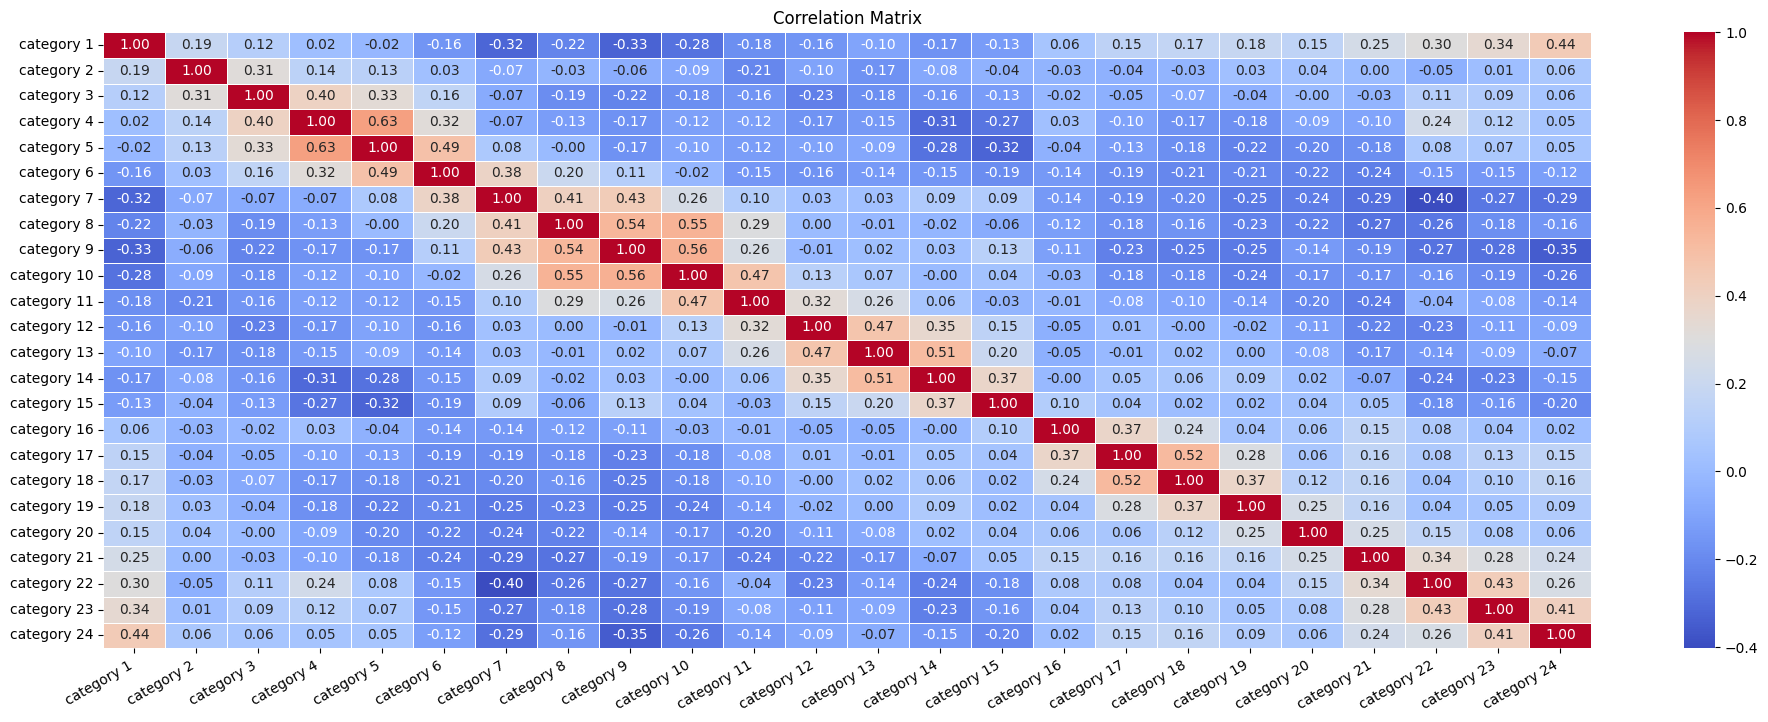

In [366]:
#Correlation Matrix
X = cleaned_df.drop('user', axis=1)
correlation_matrix = X.corr()

plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()


In [367]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [368]:
X["category 11"]

0       1.70
1       1.70
2       1.70
3       1.73
4       1.70
        ... 
5451    1.02
5452    1.01
5453    0.99
5454    0.97
5455    0.95
Name: category 11, Length: 5456, dtype: float64

For n_clusters = 2, the average silhouette score is: 0.13587980710675465
For n_clusters = 3, the average silhouette score is: 0.14168517381878024
For n_clusters = 4, the average silhouette score is: 0.1375616161808359
For n_clusters = 5, the average silhouette score is: 0.14523111441244183
For n_clusters = 6, the average silhouette score is: 0.1443890678026463
For n_clusters = 7, the average silhouette score is: 0.14113320270041052
For n_clusters = 8, the average silhouette score is: 0.14217730082696955
For n_clusters = 9, the average silhouette score is: 0.14316160723457727
For n_clusters = 10, the average silhouette score is: 0.14312710399159598
For n_clusters = 11, the average silhouette score is: 0.14730805020825283
For n_clusters = 12, the average silhouette score is: 0.16150057737505574
For n_clusters = 13, the average silhouette score is: 0.14692987121620285
For n_clusters = 14, the average silhouette score is: 0.15976361951041618
For n_clusters = 15, the average silhouette scor

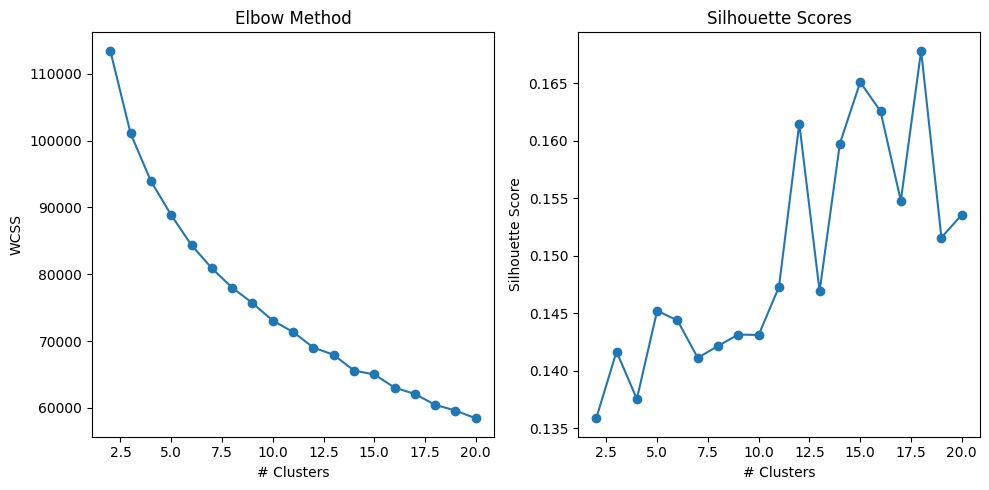

In [369]:
#finding optimal number of clusters

X_numpy = X.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numpy)


wcss = [] 
silhouette_scores = []


for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    cluster_labels = kmeans.predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the average silhouette score is: {silhouette_avg}")

#Elbow graph plotting
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(2,21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,21), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [370]:
kl = KneeLocator(range(2,21), wcss, curve="convex", direction="decreasing")
kl.elbow

7

In [371]:
optimal_clusters = 19

kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

X['Cluster'] = clusters

cluster_profiles = X.groupby('Cluster').mean()
print(cluster_profiles)

         category 1  category 2  category 3  category 4  category 5  \
Cluster                                                               
0          1.448841    2.285915    2.498963    2.789634    3.976402   
1          1.184087    1.287913    2.150609    2.198609    2.291522   
2          1.524987    2.010323    2.904609    4.606469    4.270566   
3          1.204158    2.949313    2.491065    2.518591    2.752921   
4          2.621759    2.522862    2.382621    1.965310    1.813655   
5          1.646972    3.590275    3.398349    3.075413    2.508761   
6          1.330543    3.483998    4.176218    4.160666    4.554529   
7          2.123522    2.370930    2.087774    2.069934    1.989269   
8          1.513389    1.733147    1.917381    1.928869    1.892381   
9          1.591721    2.356279    3.667767    4.099581    3.978326   
10         1.223242    1.338291    1.771570    2.773880    3.700808   
11         1.068676    1.343862    1.654088    1.597961    1.582626   
12    

In [372]:
cleaned_df.rename(columns={'user':'User', 'category 1': 'churches', 'category 2': 'resorts',
                           'category 3': 'beaches', 'category 4': 'parks',
                           'category 5': 'theatres', 'category 6': 'museums',
                           'category 7' : 'malls', 'category 8' : 'zoos', 'category 9' : 'restaurants',
                           'category 10': 'pubs/bars', 'category 11': 'local services', 'category 12': 'burger/pizza shops',
                           'category 13' : 'hotels/other lodgings', 'category 14' :'juice bars',
                           'category 15':'art galleries', 'category 16': 'dance clubs', 'category 17': 'swimming pools',
                           'category 18': 'gyms', 'category 19': 'bakeries', 'category 20': 'beauty & spas', 'category 21': 'cafes',
                           'category 22': 'view points', 'category 23': 'monuments', 'category 24': 'gardens'}, inplace=True)


In [373]:
cleaned_df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,1.509677,2.358613,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
1,User 2,1.509677,2.358613,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
2,User 3,1.509677,2.358613,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
3,User 4,1.509677,0.500000,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901
4,User 5,1.509677,2.358613,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,1.010834,0.5,1.196577,1.08607,1.868701,1.621189,1.627901


In [382]:
#Recommender Engine
X = cleaned_df.drop(columns=["User"])
mean_values = X.mean(axis=0)
users = cleaned_df['User']
discounted_df = X.copy()

for column in discounted_df.columns:
    discounted_df[column] = discounted_df[column].where(discounted_df[column] != mean_values[column] - 0.01)

In [383]:
normalized_discounted_df = discounted_df.fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(normalized_discounted_df.T)
item_similarity_df = pd.DataFrame(item_similarity, index=X.columns, columns=X.columns)


In [384]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
latent_matrix = svd.fit_transform(normalized_discounted_df)

latent_df = pd.DataFrame(latent_matrix, index=users, columns=[f'latent_{i+1}' for i in range(latent_matrix.shape[1])])


In [388]:

city_activity_mapping = {
    'Paris': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    'Barcelona': [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1], 
    'London': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],  
    'Rome': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],  
    'Berlin': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],  
    'Amsterdam': [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],  
    'Lisbon': [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1],  
}


cities = list(city_activity_mapping.keys())
city_activity_matrix = np.array(list(city_activity_mapping.values()))

activities = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoos', 
              'restaurants', 'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
              'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens', 'gardens']


def get_similar_cities(user_input_activities, n=1):
    """
    Recommends cities based on user-selected activity preferences.
    
    Args:
        user_input_activities (list): List of selected activities.
        n (int): Number of cities to recommend.

    Returns:
        List of top N recommended cities.
    """

    user_vector = np.zeros(len(activities))
    

    for activity in user_input_activities:
        if activity in activities:
            user_vector[activities.index(activity)] = 1  


    city_similarity = cosine_similarity([user_vector], city_activity_matrix)[0]
    

    similar_cities_indices = city_similarity.argsort()[-n:][::-1]
    
    
    return [cities[i] for i in similar_cities_indices]

In [389]:
def recommend_activities(user_input_activities, n=5):
    """
    Recommends additional activities based on selected activities.
    
    Args:
        user_input_activities (list): List of activities the user likes.
        n (int): Number of activities to recommend.

    Returns:
        List of top N recommended activities.
    """
    
    user_input_activities = [activity.lower() for activity in user_input_activities]
    

    activity_similarity_df = item_similarity_df.rename(str.lower, axis='columns').rename(str.lower, axis='index')
    
 
    activity_scores = pd.Series(0, index=activity_similarity_df.columns)

    for activity in user_input_activities:

        if activity in activity_similarity_df.index:
            activity_scores += activity_similarity_df[activity]
        else:
            print(f"Activity '{activity}' not found in dataset columns.")


    recommended_activities = activity_scores.drop(user_input_activities, errors='ignore').sort_values(ascending=False).head(n)
    
    return recommended_activities.index.tolist()


In [393]:
user_selected_activities = ['gyms', 'swimming pools']

# Recommend cities
recommended_cities = get_similar_cities(user_selected_activities, n=5)
print("Recommended Cities:", recommended_cities)

# Recommend additional activities
recommended_activities = recommend_activities(user_selected_activities, n=5)
print("Recommended Activities:", recommended_activities)


Recommended Cities: ['Lisbon', 'Amsterdam', 'Barcelona', 'Berlin', 'Rome']
Activity 'swimming' not found in dataset columns.
Recommended Activities: ['swimming pools', 'churches', 'bakeries', 'gardens', 'dance clubs']
